## 1. Data Loading & Pre-processing

In [55]:
import pandas as pd

# Load the CSV file
file_path = "synthetic_fraud_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())


  transaction_id customer_id       card_number  \
0    TX_a0ad2a2a  CUST_72886  6646734767813109   
1    TX_3599c101  CUST_70474   376800864692727   
2    TX_a9461c6d  CUST_10715  5251909460951913   
3    TX_7be21fc4  CUST_16193   376079286931183   
4    TX_150f490b  CUST_87572  6172948052178810   

                          timestamp merchant_category merchant_type  \
0  2024-09-30 00:00:01.034820+00:00        Restaurant     fast_food   
1  2024-09-30 00:00:01.764464+00:00     Entertainment        gaming   
2  2024-09-30 00:00:02.273762+00:00           Grocery      physical   
3  2024-09-30 00:00:02.297466+00:00               Gas         major   
4  2024-09-30 00:00:02.544063+00:00        Healthcare       medical   

         merchant     amount currency    country  ...   device channel  \
0       Taco Bell     294.87      GBP         UK  ...  iOS App  mobile   
1           Steam    3368.97      BRL     Brazil  ...     Edge     web   
2     Whole Foods  102582.38      JPY      Japan  

**Sampling the data using stratified sampling**

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define sample size
sample_size = 300000

# Calculate the sample fraction
sample_fraction = sample_size / len(data)

# Perform stratified sampling
stratified_sample, _ = train_test_split(
    data,
    stratify=data['is_fraud'],  # Preserve the target variable's distribution
    test_size=1 - sample_fraction,    # Exclude the remainder
    random_state=21
)

# Save the stratified sample to a new CSV (optional)
stratified_sample.to_csv('sampled_fraud_data.csv', index=False)

# Display class distribution in the sample
print(stratified_sample['is_fraud'].value_counts(normalize=True))


is_fraud
False    0.800273
True     0.199727
Name: proportion, dtype: float64


In [57]:
file_path = "sampled_fraud_data.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head().T

,0,1,2,3,4
transaction_id,TX_096ac504,TX_b4fc249b,TX_e7a8342f,TX_af2f6e32,TX_2963cca8
customer_id,CUST_23264,CUST_69172,CUST_65854,CUST_72072,CUST_47168
card_number,5907560822147852,6964509754759117,6340933244890610,379855553189895,4651392195611897
timestamp,2024-10-28 18:44:19.628914+00:00,2024-10-09 06:10:10.451308+00:00,2024-10-21 19:39:40.672085+00:00,2024-09-30 09:17:29.412544+00:00,2024-10-23 05:27:59.249798+00:00
merchant_category,Gas,Gas,Retail,Grocery,Travel
merchant_type,major,local,physical,online,hotels
merchant,Mobil,Highway Gas Stop,IKEA,Amazon Fresh,Marriott
amount,32145.02,340.67,2026.95,2214.97,51106.42
currency,RUB,EUR,BRL,BRL,RUB
country,Russia,Germany,Brazil,Brazil,Russia


In [58]:
df = pd.DataFrame(data)

**converting amount into USD**

In [60]:
df['currency'].unique()

array(['RUB', 'EUR', 'BRL', 'CAD', 'AUD', 'USD', 'MXN', 'GBP', 'JPY',
       'NGN', 'SGD'], dtype=object)

In [62]:
conversion_rates = {
    'USD': 1.0,
    'EUR': 1.1,
    'GBP': 1.3,
    'JPY': 0.0075,
    'RUB': 0.013,
    'AUD': 0.65,
    'BRL': 0.2,
    'MXN': 0.05,
    'SGD': 0.73,
    'CAD': 0.74,
    'NGN': 0.002
}

# Convert amounts to USD
df['amount'] = df.apply(
    lambda x: x['amount'] * conversion_rates[x['currency']], axis=1
)

# View the result
df['amount'].head()

0      5.432508
1    412.210700
2     81.078000
3     88.598800
4      8.636985
Name: amount, dtype: float64

## 2.Exploratory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   transaction_id       300000 non-null  object 
 1   customer_id          300000 non-null  object 
 2   card_number          300000 non-null  int64  
 3   timestamp            300000 non-null  object 
 4   merchant_category    300000 non-null  object 
 5   merchant_type        300000 non-null  object 
 6   merchant             300000 non-null  object 
 7   amount               300000 non-null  float64
 8   currency             300000 non-null  object 
 9   country              300000 non-null  object 
 10  city                 300000 non-null  object 
 11  city_size            300000 non-null  object 
 12  card_type            300000 non-null  object 
 13  card_present         300000 non-null  bool   
 14  device               300000 non-null  object 
 15  channel          

In [8]:
df.describe()

,card_number,amount,distance_from_home,transaction_hour
count,3.000000e+05,300000.000000,300000.000000,300000.000000
mean,4.217007e+15,615.159298,0.321857,12.169357
std,2.345357e+15,821.820389,0.467189,6.537271
min,3.700086e+14,0.008060,0.000000,0.000000
25%,3.799914e+14,214.487390,0.000000,7.000000
50%,5.007018e+15,398.422000,0.000000,12.000000
75%,6.003532e+15,715.960285,1.000000,18.000000
max,6.999728e+15,14929.206000,1.000000,23.000000


**Dropping the columns that are not needed.**

In [63]:
df.drop(['transaction_id', 'customer_id', 'card_number', 'ip_address', 'device_fingerprint', 'currency'], axis = 1, inplace = True)

In [64]:
df.shape

(300000, 18)

**converting boolean columns into int - 1,0**

In [65]:
boolean_columns = df.select_dtypes('boolean').columns
for boolean_col in boolean_columns:
  print(boolean_col)
  print(df[boolean_col].unique())
  print()


card_present
[False  True]

high_risk_merchant
[False  True]

weekend_transaction
[False  True]

is_fraud
[False  True]



In [66]:
for boolean_col in boolean_columns:
  df[boolean_col] = df[boolean_col].astype(int)

**unfloding the values in 'velocity_last_hour'**

In [67]:
import pprint

transaction_velocity = df['velocity_last_hour'].iloc[0]
pprint.pprint(transaction_velocity)


("{'num_transactions': 41, 'total_amount': 138045.7077807439, "
 "'unique_merchants': 31, 'unique_countries': 8, 'max_single_amount': "
 '35071.313172422044}')


In [68]:
import ast
# Step 1: Parse velocity_last_hour if it's stored as a string
if isinstance(df['velocity_last_hour'].iloc[0], str):
    df['velocity_last_hour'] = df['velocity_last_hour'].apply(ast.literal_eval)

# Step 2: Extract each metric from the dictionary
df['num_transactions_in_last_hour'] = df['velocity_last_hour'].apply(lambda x: x.get('num_transactions', 0))
df['total_amount_in_last_hour'] = df['velocity_last_hour'].apply(lambda x: x.get('total_amount', 0.0))
df['unique_merchants_in_last_hour'] = df['velocity_last_hour'].apply(lambda x: x.get('unique_merchants', 0))
df['unique_countries_in_last_hour'] = df['velocity_last_hour'].apply(lambda x: x.get('unique_countries', 0))
df['max_single_amount_in_last_hour'] = df['velocity_last_hour'].apply(lambda x: x.get('max_single_amount', 0.0))




In [69]:
df = df.drop(columns=['velocity_last_hour'])

df.head().T

,0,1,2,3,4
timestamp,2024-10-28 18:44:19.628914+00:00,2024-10-09 06:10:10.451308+00:00,2024-10-21 19:39:40.672085+00:00,2024-09-30 09:17:29.412544+00:00,2024-10-23 05:27:59.249798+00:00
merchant_category,Gas,Gas,Retail,Grocery,Travel
merchant_type,major,local,physical,online,hotels
merchant,Mobil,Highway Gas Stop,IKEA,Amazon Fresh,Marriott
amount,5.432508,412.2107,81.078,88.5988,8.636985
country,Russia,Germany,Brazil,Brazil,Russia
city,Unknown City,Unknown City,Unknown City,Unknown City,Unknown City
city_size,medium,medium,medium,medium,medium
card_type,Premium Debit,Basic Debit,Premium Debit,Gold Credit,Gold Credit
card_present,0,0,0,0,0


**Verifying the effect of transaction at different times in a day**

In [70]:
## Convert timestamp column into different data type
df['timestamp'] = pd.to_datetime(df['timestamp'], format='ISO8601')

In [71]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df.drop('timestamp', axis = 1, inplace = True)

In [72]:
df.dtypes

merchant_category                  object
merchant_type                      object
merchant                           object
amount                            float64
country                            object
city                               object
city_size                          object
card_type                          object
card_present                        int64
device                             object
channel                            object
distance_from_home                  int64
high_risk_merchant                  int64
transaction_hour                    int64
weekend_transaction                 int64
is_fraud                            int64
num_transactions_in_last_hour       int64
total_amount_in_last_hour         float64
unique_merchants_in_last_hour       int64
unique_countries_in_last_hour       int64
max_single_amount_in_last_hour    float64
year                                int32
month                               int32
day                               

## 3.Splitting the data

In [73]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# train and validation

df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(180000, 60000, 60000)

In [74]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [75]:
y_train = df_train.is_fraud.values
y_val = df_val.is_fraud.values
y_test = df_test.is_fraud.values

In [76]:
del df_train['is_fraud']
del df_val['is_fraud']
del df_test['is_fraud']

## 4. Feature selection

In [77]:
numerical = ['amount',
             'distance_from_home',
             'high_risk_merchant',
             'transaction_hour',
             'weekend_transaction',
             'num_transactions_in_last_hour',
             'total_amount_in_last_hour',
             'unique_merchants_in_last_hour',
             'unique_countries_in_last_hour',
             'max_single_amount_in_last_hour']


In [78]:
categorical = ['merchant_category',
               'merchant_type',
               'merchant',
               'country',
               'city',
               'city_size',
               'card_type',
               'card_present',
               'device',
               'channel',
               'year',
               'month',
               'day',
               'hour']

**Mutual Information**

In [79]:
from sklearn.metrics import mutual_info_score

def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.is_fraud)


mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)


device               0.157538
channel              0.157473
card_present         0.157472
hour                 0.073207
country              0.071053
city                 0.004055
city_size            0.001553
merchant             0.000180
day                  0.000080
merchant_type        0.000022
card_type            0.000013
merchant_category    0.000006
month                0.000003
year                 0.000000
dtype: float64

**High Mutual Information (MI) Scores:**
- device,
- channel,
- card_present



**Moderate Mutual Information (MI) Scores:**
- transaction_hour,
- country,
- currency

**Low Mutual Information (MI) Scores:**

- city,
- city_size,
- merchant,
- day,
- merchant_type,
- card_type,
- merchant_category,
- month,
- year


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [81]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')

X_train = dv.fit_transform(train_dict)

model = LogisticRegression()

model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Validation

In [82]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

x_val = dv.fit_transform(val_dict)

y_pred = model.predict(x_val)

# Evaluate model performance with all features

print("Model 1 - ROC AUC Score:", roc_auc_score(y_val, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print()
print("Classification Report:\n", classification_report(y_val, y_pred))

Model 1 - ROC AUC Score: 0.5

Confusion Matrix:
 [[47926     0]
 [12074     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     47926
           1       0.00      0.00      0.00     12074

    accuracy                           0.80     60000
   macro avg       0.40      0.50      0.44     60000
weighted avg       0.64      0.80      0.71     60000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

### Testing

In [83]:
test_dict = df_test[categorical + numerical].to_dict(orient='records')

x_test = dv.fit_transform(test_dict)

y_pred = model.predict(x_test)

# Evaluate model performance
print("Model1 Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Model 1 - ROC AUC Score:", roc_auc_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))

Model1 Accuracy: 0.7970333333333334

Model 1 - ROC AUC Score: 0.5

Confusion Matrix:
 [[47822     0]
 [12178     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     47822
           1       0.00      0.00      0.00     12178

    accuracy                           0.80     60000
   macro avg       0.40      0.50      0.44     60000
weighted avg       0.64      0.80      0.71     60000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

**Checking model performance by eliminating low dependent features**

In [84]:
# List of features to drop
low_mi_features = ['year', 'month', 'merchant_category', 'card_type', 'merchant_type', 'day']

In [85]:
df_train1 = df_train.drop(columns=low_mi_features)
df_val1 = df_val.drop(columns=low_mi_features)
df_test1 = df_test.drop(columns=low_mi_features)

In [86]:
dv = DictVectorizer(sparse=False)

train_dict = df_train1.to_dict(orient='records')

X_train = dv.fit_transform(train_dict)

model = LogisticRegression()

model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
val_dict = df_val1.to_dict(orient='records')

x_val = dv.fit_transform(val_dict)

y_pred = model.predict(x_val)

# Evaluate model performance
print("Model 2 Accuracy:", accuracy_score(y_val, y_pred))
print()
print("Model 2 - ROC AUC Score:", roc_auc_score(y_val, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print()
print("Classification Report:\n", classification_report(y_val, y_pred))

Model 2 Accuracy: 0.7987666666666666

Model 2 - ROC AUC Score: 0.5

Confusion Matrix:
 [[47926     0]
 [12074     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     47926
           1       0.00      0.00      0.00     12074

    accuracy                           0.80     60000
   macro avg       0.40      0.50      0.44     60000
weighted avg       0.64      0.80      0.71     60000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [88]:
test_dict = df_test1.to_dict(orient='records')

x_test = dv.fit_transform(test_dict)

y_pred = model.predict(x_test)

# Evaluate model performance
print("Model2 Accuracy:", accuracy_score(y_test, y_pred))
print()
print("Model 2 - ROC AUC Score:", roc_auc_score(y_test, y_pred))
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print()
print("Classification Report:\n", classification_report(y_test, y_pred))

Model2 Accuracy: 0.7970333333333334

Model 2 - ROC AUC Score: 0.5

Confusion Matrix:
 [[47822     0]
 [12178     0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     47822
           1       0.00      0.00      0.00     12178

    accuracy                           0.80     60000
   macro avg       0.40      0.50      0.44     60000
weighted avg       0.64      0.80      0.71     60000



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

**There is no much difference in performance, need to check with other models**

**Correlation**

In [89]:
df_full_train[numerical].corrwith(df_full_train.is_fraud).abs().sort_values(ascending=False)

distance_from_home                0.635066
transaction_hour                  0.278116
amount                            0.043590
max_single_amount_in_last_hour    0.007468
unique_countries_in_last_hour     0.006812
unique_merchants_in_last_hour     0.004424
weekend_transaction               0.002535
num_transactions_in_last_hour     0.001468
high_risk_merchant                0.001398
total_amount_in_last_hour         0.000200
dtype: float64

### Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

In [92]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjust max_depth for regularization


dt_model.fit(X_train, y_train)


val_dict = df_val[categorical + numerical].to_dict(orient='records')

x_val = dv.fit_transform(val_dict)
# Predictions
dt_preds = dt_model.predict(x_val)

# Evaluation for Decision Tree
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_val, dt_preds))
print("Decision Tree - ROC AUC Score:", roc_auc_score(y_val, dt_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, dt_preds))
print("Classification Report:\n", classification_report(y_val, dt_preds))

Decision Tree Results
Accuracy: 0.9345333333333333
Decision Tree - ROC AUC Score: 0.8496349083419014
Confusion Matrix:
 [[47529   397]
 [ 3531  8543]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     47926
           1       0.96      0.71      0.81     12074

    accuracy                           0.93     60000
   macro avg       0.94      0.85      0.89     60000
weighted avg       0.94      0.93      0.93     60000



**Decision Tree parameter tuning**

In [95]:
scores = []

for i in range(5, 60, 5):
    dt_model = DecisionTreeClassifier(max_depth=i, random_state=42)  # Adjust max_depth for regularization
    dt_model.fit(X_train, y_train)
    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    x_val = dv.fit_transform(val_dict)
    dt_preds = dt_model.predict(x_val)
    scores.append((i, roc_auc_score(y_val, dt_preds)))


df_scores = pd.DataFrame(scores, columns=['max_depth', 'auc'])

In [96]:
df_scores

,max_depth,auc
0,5,0.849635
1,10,0.927784
2,15,0.944713
3,20,0.952389
4,25,0.952245
5,30,0.951711
6,35,0.952468
7,40,0.950552
8,45,0.951610
9,50,0.951610


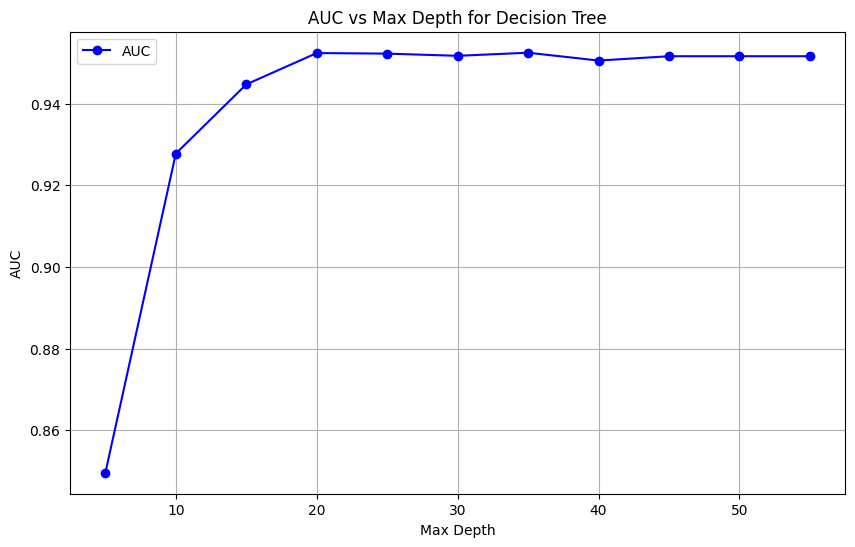

In [97]:
import matplotlib.pyplot as plt

# Plotting max_depth vs. AUC
plt.figure(figsize=(10, 6))
plt.plot(df_scores['max_depth'], df_scores['auc'], marker='o', linestyle='-', color='b', label='AUC')
plt.xlabel('Max Depth')
plt.ylabel('AUC')
plt.title('AUC vs Max Depth for Decision Tree')
plt.grid(True)
plt.legend()
plt.show()


In [98]:
scores = []

for depth in range(5, 50, 5):
    for s in [1, 5, 10, 15, 20, 100, 200, 500]:
        dt_model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s, random_state=42)  # Adjust max_depth for regularization
        dt_model.fit(X_train, y_train)
        val_dict = df_val[categorical + numerical].to_dict(orient='records')
        x_val = dv.fit_transform(val_dict)
        # Predictions
        dt_preds = dt_model.predict(x_val)
        scores.append((depth, s, roc_auc_score(y_val, dt_preds)))


In [99]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                                   \
max_depth            5      10     15     20     25     30     35     40   
min_samples_leaf                                                           
1                 0.850  0.928  0.945  0.952  0.952  0.952  0.952  0.951   
5                 0.850  0.928  0.947  0.953  0.952  0.952  0.952  0.952   
10                0.850  0.927  0.947  0.952  0.951  0.951  0.951  0.951   
15                0.850  0.927  0.947  0.951  0.950  0.951  0.951  0.951   
20                0.850  0.927  0.946  0.949  0.949  0.949  0.949  0.949   
100               0.849  0.923  0.930  0.930  0.930  0.930  0.930  0.930   
200               0.849  0.918  0.927  0.927  0.927  0.927  0.927  0.927   
500               0.852  0.914  0.918  0.918  0.918  0.918  0.918  0.918   

                         
max_depth            45  
min_samples_leaf         
1                 0.952  
5                 0.952  
10                0.951  
15                0.951  
20                0.949  
100               0.930  
200               0.927  
500               0.918

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

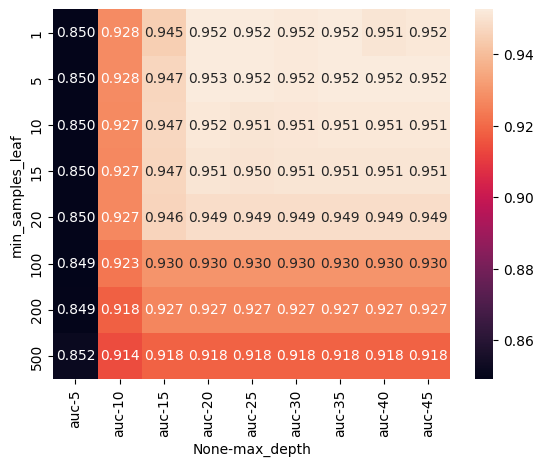

In [103]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

**DecisionTree: max_depth = 20, min_samples_leaf = 5: ROC = 0.953**

### Random Forest

In [104]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Adjust n_estimators and max_depth

rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(x_val)

# Evaluation for Random Forest
print("\nRandom Forest Results")
print("ROC AUC Score:", roc_auc_score(y_val, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_val, rf_preds))
print("Classification Report:\n", classification_report(y_val, rf_preds))



Random Forest Results
ROC AUC Score: 0.8350532515442562
Confusion Matrix:
 [[47727   199]
 [ 3933  8141]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     47926
           1       0.98      0.67      0.80     12074

    accuracy                           0.93     60000
   macro avg       0.95      0.84      0.88     60000
weighted avg       0.93      0.93      0.93     60000



**Random forest parameter tuning**

In [105]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(x_val)
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))


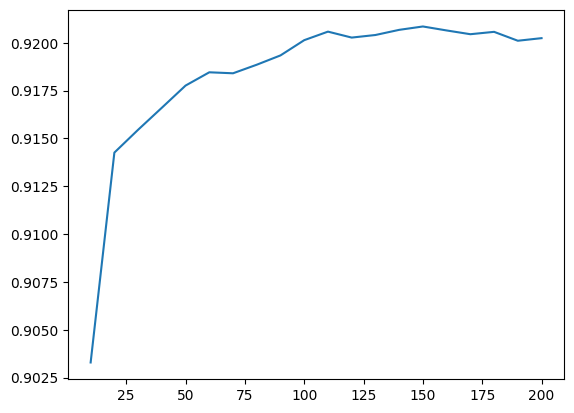

In [106]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

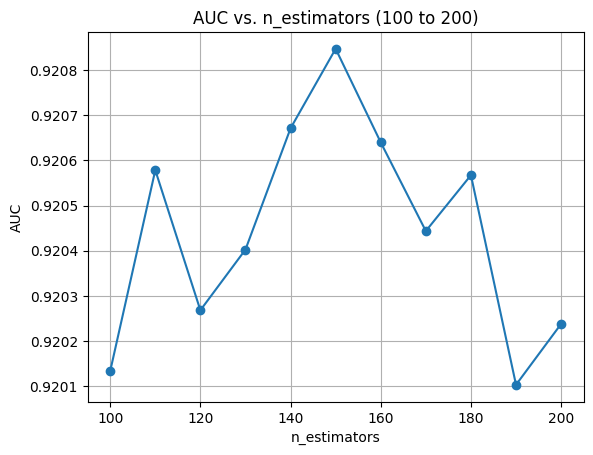

In [107]:
# Filter the DataFrame for n_estimators between 100 and 150
df_filtered = df_scores[(df_scores.n_estimators >= 100) & (df_scores.n_estimators <= 200)]

# Plot the filtered data
plt.plot(df_filtered.n_estimators, df_filtered.auc, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.title('AUC vs. n_estimators (100 to 200)')
plt.grid(True)
plt.show()


In [109]:
scores = []
for d in [20, 30, 40, 50]:
  for n in range(120, 181, 10):
      rf = RandomForestClassifier(n_estimators=n, max_depth = d, random_state=1)
      rf.fit(X_train, y_train)

      y_pred = rf.predict(x_val)
      auc = roc_auc_score(y_val, y_pred)

      scores.append((d, n, auc))


In [110]:
import matplotlib.pyplot as plt

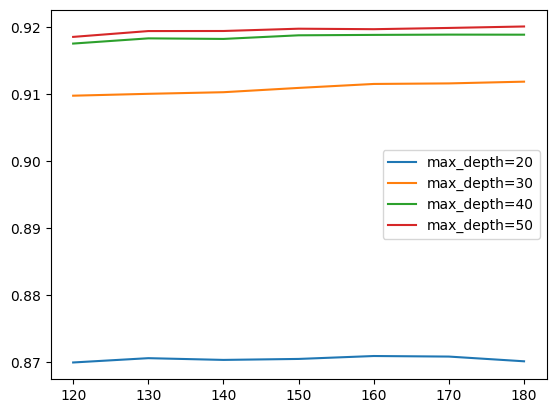

In [112]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
for d in [20, 30, 40, 50]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [121]:
scores = []
for d in [50, 60, 70]:
  for n in range(120, 181, 10):
      rf = RandomForestClassifier(n_estimators=n, max_depth = d, random_state=1)
      rf.fit(X_train, y_train)

      y_pred = rf.predict(x_val)
      auc = roc_auc_score(y_val, y_pred)

      scores.append((d, n, auc))


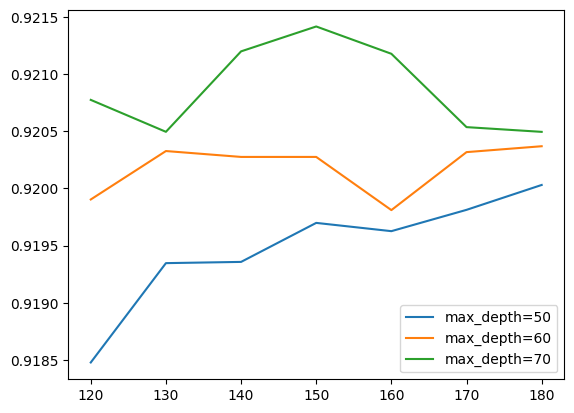

In [123]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
for d in [50, 60, 70]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [124]:
depth = 70
estimator = 150
scores = []

for s in [1, 3, 5, 10, 50]:
  rf = RandomForestClassifier(n_estimators=estimator,
                                    max_depth=depth,
                                    min_samples_leaf=s,
                                    random_state=1)
  rf.fit(X_train, y_train)
  y_pred = rf.predict(x_val)
  auc = roc_auc_score(y_val, y_pred)
  scores.append((s, estimator, auc))


In [125]:
scores

[(1, 150, 0.921417395382566),
 (3, 150, 0.9173417395299616),
 (5, 150, 0.9048074266335355),
 (10, 150, 0.8942513823575855),
 (50, 150, 0.8599337681233223)]

**RandomForest: n_estimators = 150, max_depth = 70, min_samples_leaf = 1**

### XGBoost

In [130]:
import xgboost as xgb

In [131]:
features = list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(x_val, label=y_val, feature_names=features)

In [132]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [133]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)
y_pred = model.predict(dval)

In [134]:
roc_auc_score(y_val, y_pred)

0.983276127286427

In [135]:
# Define the watchlist with both training and validation datasets
watchlist = [(dtrain, 'train'), (dval, 'validation')]

scores = {}
eta_values = [0.1, 0.3, 0.5, 1]  # List of eta values to test

for eta in eta_values:
    xgb_params = {
        'eta': eta,  # Set the current eta value
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }
    
    # Dictionary to store evaluation results
    evals_result = {}
    
    # Train the model
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=200,
        evals=watchlist,  # Pass the watchlist here
        evals_result=evals_result,  # Capture evaluation results directly
        verbose_eval=5
    )
    
    # Extract validation AUC for each boosting round
    num_iter = list(range(len(evals_result['validation']['auc'])))  # Use the correct key 'validation'
    val_auc = evals_result['validation']['auc']
    df_scores = pd.DataFrame({'num_iter': num_iter, 'val_auc': val_auc})
    scores[f'eta={eta}'] = df_scores


[0]	train-auc:0.97215	validation-auc:0.97169
[5]	train-auc:0.97648	validation-auc:0.97595
[10]	train-auc:0.97793	validation-auc:0.97759
[15]	train-auc:0.97818	validation-auc:0.97775
[20]	train-auc:0.97974	validation-auc:0.97931
[25]	train-auc:0.98203	validation-auc:0.98167
[30]	train-auc:0.98348	validation-auc:0.98331
[35]	train-auc:0.98429	validation-auc:0.98405
[40]	train-auc:0.98510	validation-auc:0.98481
[45]	train-auc:0.98667	validation-auc:0.98629
[50]	train-auc:0.98770	validation-auc:0.98725
[55]	train-auc:0.98860	validation-auc:0.98810
[60]	train-auc:0.98922	validation-auc:0.98871
[65]	train-auc:0.99072	validation-auc:0.99021
[70]	train-auc:0.99145	validation-auc:0.99093
[75]	train-auc:0.99206	validation-auc:0.99149
[80]	train-auc:0.99259	validation-auc:0.99204
[85]	train-auc:0.99295	validation-auc:0.99240
[90]	train-auc:0.99326	validation-auc:0.99263
[95]	train-auc:0.99347	validation-auc:0.99280
[100]	train-auc:0.99376	validation-auc:0.99307
[105]	train-auc:0.99404	validation-

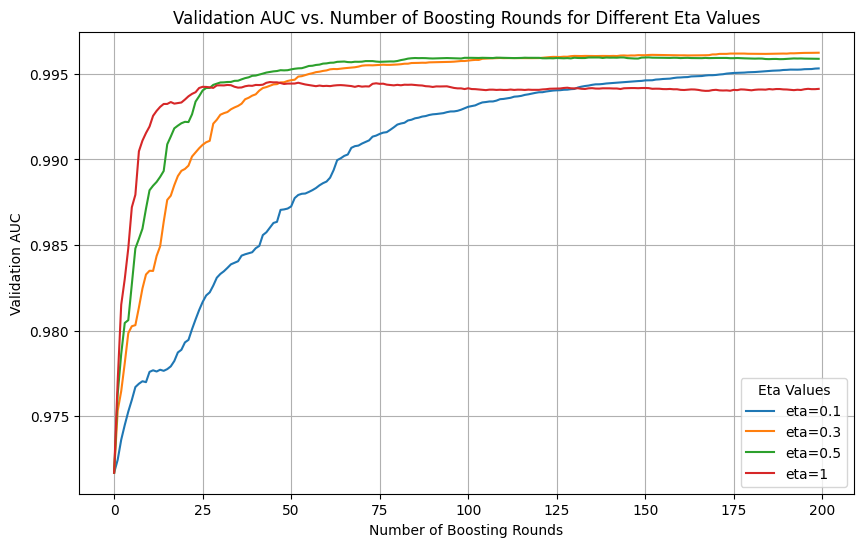

In [136]:
# Plotting the results
plt.figure(figsize=(10, 6))
for eta, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=eta)

plt.xlabel("Number of Boosting Rounds")
plt.ylabel("Validation AUC")
plt.title("Validation AUC vs. Number of Boosting Rounds for Different Eta Values")
plt.legend(title="Eta Values")
plt.grid(True)
plt.show()

In [137]:
# Define the watchlist with both training and validation datasets
watchlist = [(dtrain, 'train'), (dval, 'validation')]

scores = {}
eta = 0.5
depth_values = [3,6,10]

for depth in depth_values:
    xgb_params = {
        'eta': eta,  # Set the current eta value
        'max_depth': depth,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }
    
    # Dictionary to store evaluation results
    evals_result = {}
    
    # Train the model
    model = xgb.train(
        xgb_params,
        dtrain,
        num_boost_round=200,
        evals=watchlist,  # Pass the watchlist here
        evals_result=evals_result,  # Capture evaluation results directly
        verbose_eval=5
    )
    
    # Extract validation AUC for each boosting round
    num_iter = list(range(len(evals_result['validation']['auc'])))  # Use the correct key 'validation'
    val_auc = evals_result['validation']['auc']
    df_scores = pd.DataFrame({'num_iter': num_iter, 'val_auc': val_auc})
    scores[f'depth={depth}'] = df_scores


[0]	train-auc:0.94854	validation-auc:0.94753
[5]	train-auc:0.97671	validation-auc:0.97598
[10]	train-auc:0.98217	validation-auc:0.98192
[15]	train-auc:0.98409	validation-auc:0.98399
[20]	train-auc:0.98654	validation-auc:0.98636
[25]	train-auc:0.98816	validation-auc:0.98792
[30]	train-auc:0.98905	validation-auc:0.98887
[35]	train-auc:0.98976	validation-auc:0.98952
[40]	train-auc:0.99017	validation-auc:0.98990
[45]	train-auc:0.99146	validation-auc:0.99126
[50]	train-auc:0.99205	validation-auc:0.99187
[55]	train-auc:0.99239	validation-auc:0.99220
[60]	train-auc:0.99277	validation-auc:0.99249
[65]	train-auc:0.99295	validation-auc:0.99267
[70]	train-auc:0.99322	validation-auc:0.99289
[75]	train-auc:0.99332	validation-auc:0.99295
[80]	train-auc:0.99345	validation-auc:0.99302
[85]	train-auc:0.99373	validation-auc:0.99333
[90]	train-auc:0.99392	validation-auc:0.99354
[95]	train-auc:0.99400	validation-auc:0.99364
[100]	train-auc:0.99417	validation-auc:0.99382
[105]	train-auc:0.99433	validation-

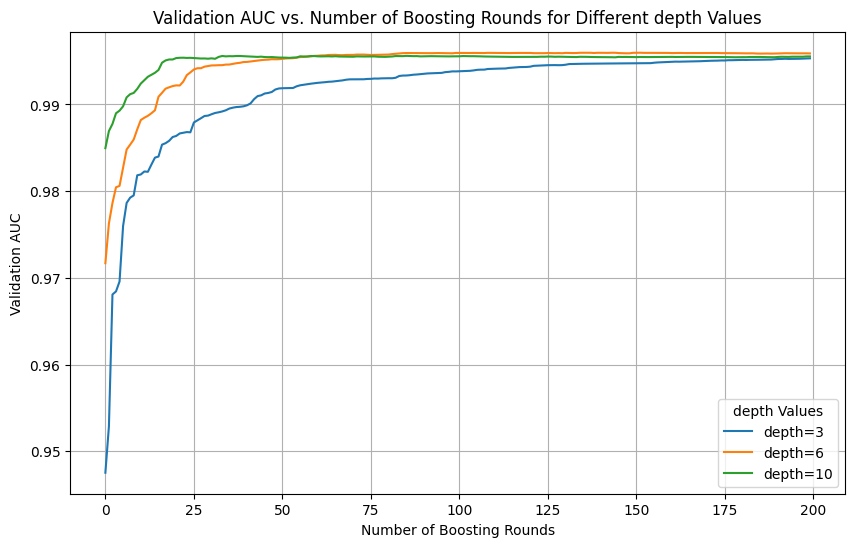

In [138]:
# Plotting the results
plt.figure(figsize=(10, 6))
for depth, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=depth)

plt.xlabel("Number of Boosting Rounds")
plt.ylabel("Validation AUC")
plt.title("Validation AUC vs. Number of Boosting Rounds for Different depth Values")
plt.legend(title="depth Values")
plt.grid(True)
plt.show()

**XGBoost: eta = 0.5, depth = 6**

### Selecting the model

**DecisionTree**

**DecisionTree: max_depth = 20, min_samples_leaf = 5: ROC = 0.953**

In [139]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)


# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth = 20,min_samples_leaf=5, random_state=42)


dt_model.fit(X_train, y_train)


test_dict = df_test[categorical + numerical].to_dict(orient='records')

x_test = dv.fit_transform(test_dict)
# Predictions
dt_preds = dt_model.predict(x_test)

# Evaluation for Decision Tree
print("Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("Decision Tree - ROC AUC Score:", roc_auc_score(y_test, dt_preds))

Decision Tree Results
Accuracy: 0.97285
Decision Tree - ROC AUC Score: 0.9519680553080734


**Random Forest**

**RandomForest: n_estimators = 150, max_depth = 70, min_samples_leaf = 1**

In [140]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=150, max_depth=70, min_samples_leaf=1, random_state=42)

rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(x_test)

# Evaluation for Random Forest
print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, dt_preds))
print("ROC AUC Score:", roc_auc_score(y_test, rf_preds))


Random Forest Results
Accuracy: 0.97285
ROC AUC Score: 0.9212867372168342


**XGBoost**

**XGBoost: eta = 0.5, depth = 6**

In [143]:
dtrain = xgb.DMatrix(X_train, label=y_train,
                         feature_names=dv.get_feature_names_out().tolist())

dtest = xgb.DMatrix(x_test, feature_names=dv.get_feature_names_out().tolist())

In [144]:
xgb_params = {
    'eta': 0.5, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [147]:
y_pred = model.predict(dtest)

print("\n XGboost Results")
print('ROC AUC Score', roc_auc_score(y_test, y_pred))


 XGboost Results
ROC AUC Score 0.9959464534612015
